In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set();

In [20]:
def make_data(N, f=0.3, rseed=1):
    rand = np.random.RandomState(rseed)
    x = rand.randn(N)
    x[int(f * N):] += 5
    return x

x = make_data(1000)

In [21]:
x

array([ 1.62434536e+00, -6.11756414e-01, -5.28171752e-01, -1.07296862e+00,
        8.65407629e-01, -2.30153870e+00,  1.74481176e+00, -7.61206901e-01,
        3.19039096e-01, -2.49370375e-01,  1.46210794e+00, -2.06014071e+00,
       -3.22417204e-01, -3.84054355e-01,  1.13376944e+00, -1.09989127e+00,
       -1.72428208e-01, -8.77858418e-01,  4.22137467e-02,  5.82815214e-01,
       -1.10061918e+00,  1.14472371e+00,  9.01590721e-01,  5.02494339e-01,
        9.00855949e-01, -6.83727859e-01, -1.22890226e-01, -9.35769434e-01,
       -2.67888080e-01,  5.30355467e-01, -6.91660752e-01, -3.96753527e-01,
       -6.87172700e-01, -8.45205641e-01, -6.71246131e-01, -1.26645989e-02,
       -1.11731035e+00,  2.34415698e-01,  1.65980218e+00,  7.42044161e-01,
       -1.91835552e-01, -8.87628964e-01, -7.47158294e-01,  1.69245460e+00,
        5.08077548e-02, -6.36995647e-01,  1.90915485e-01,  2.10025514e+00,
        1.20158952e-01,  6.17203110e-01,  3.00170320e-01, -3.52249846e-01,
       -1.14251820e+00, -

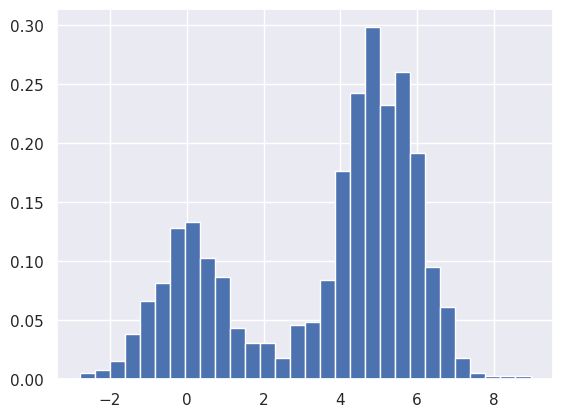

In [22]:
hist = plt.hist(x, bins=30, density=True, stacked=True);

In [23]:
density, bins, patches = hist
widths = bins[1:] - bins[:-1]
(density * widths).sum()

1.0

In [24]:
x = make_data(20)
bins = np.linspace(-5, 10, 10)

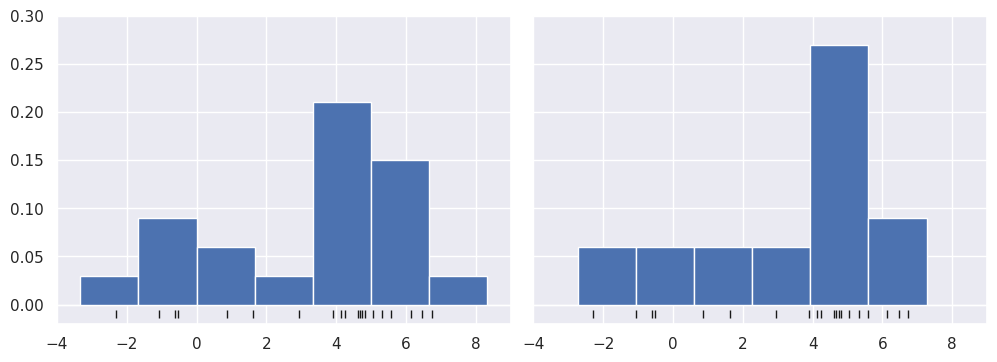

In [27]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4), 
                       sharex=True, sharey=True, 
                       subplot_kw={'xlim': (-4, 9),
                                   'ylim': (-0.02, 0.3)})
fig.subplots_adjust(wspace=0.05)
for i, offset in enumerate([0.0, 0.6]):
    ax[i].hist(x, bins=bins + offset, density=True, stacked=True)
    ax[i].plot(x, np.full_like(x, -0.01), '|k', markeredgewidth=1)

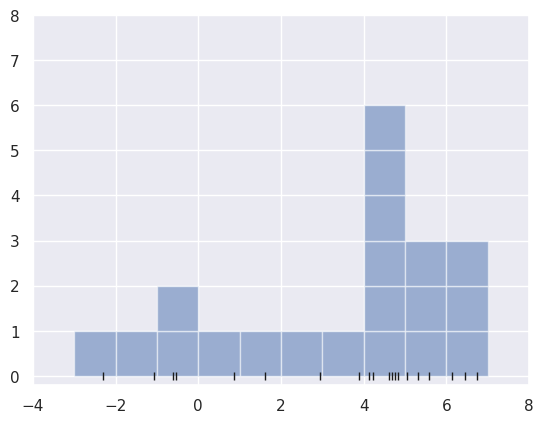

In [30]:
fig, ax = plt.subplots()
bins = np.arange(-3, 8)
ax.plot(x, np.full_like(x, -0.01), '|k', markeredgewidth=1)
for count, edge in zip(*np.histogram(x, bins)):
    for i in range(count):
        ax.add_patch(plt.Rectangle((edge, i), 1, 1, alpha=0.5))
ax.set_xlim(-4, 8)
ax.set_ylim(-0.2, 8);

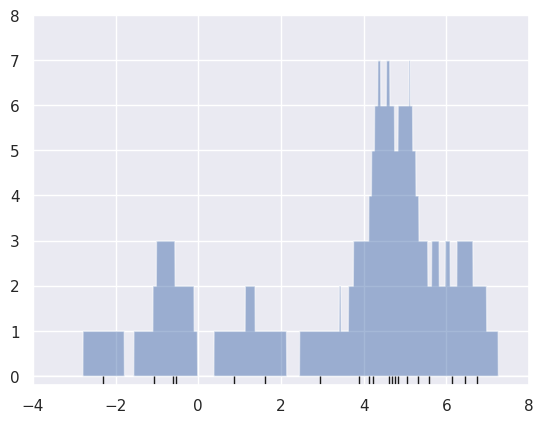

In [31]:
x_d = np.linspace(-4, 8, 2000)
density = sum((abs(xi - x_d) < 0.5) for xi in x)

plt.fill_between(x_d, density, alpha=0.5)
plt.plot(x, np.full_like(x, -0.1), '|k', markeredgewidth=1)
plt.axis([-4, 8, -0.2, 8]);

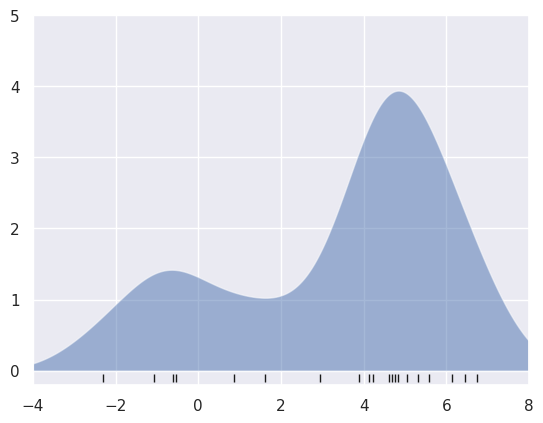

In [42]:
from scipy.stats import norm
x_d = np.linspace(-4, 8, 1000)
density = sum(norm(xi).pdf(x_d) for xi in x)
plt.fill_between(x_d, density, alpha=0.5)
plt.plot(x, np.full_like(x, -0.1), '|k', markeredgewidth=1)

plt.axis([-4, 8, -0.2, 5]);

In [43]:
from sklearn.neighbors import KernelDensity

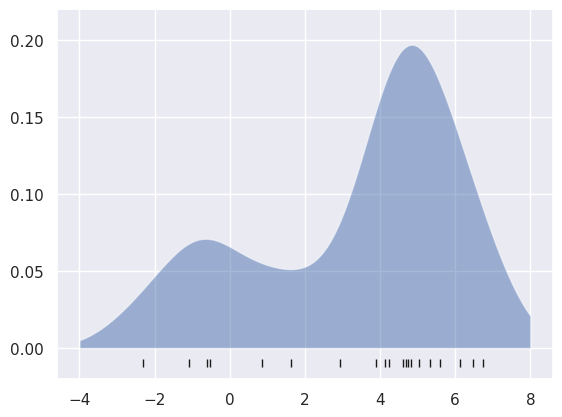

In [46]:
kde = KernelDensity(bandwidth=1.0, kernel='gaussian')
kde.fit(x[:, None])

#score_samples return log(density(P))
logprob = kde.score_samples(x_d[:, None])

plt.fill_between(x_d, np.exp(logprob), alpha=0.5)
plt.plot(x, np.full_like(x, -0.01), '|k', markeredgewidth=1)
plt.ylim(-0.02, 0.22);

In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import LeaveOneOut

In [53]:
bandwidths = 10 ** np.linspace(-1, 1, 100)
grid = GridSearchCV(KernelDensity(kernel='gaussian'), 
                  {'bandwidth': bandwidths},
                   cv=LeaveOneOut().get_n_splits(x))
grid.fit(x[:, None]);

In [54]:
grid.best_params_

{'bandwidth': 1.1233240329780276}

In [55]:
from sklearn.datasets import fetch_species_distributions

In [57]:
data = fetch_species_distributions()

In [58]:
# getting matrices of location
latlon = np.vstack([data.train['dd lat'], data.train['dd long']]).T
species = np.array([d.decode('ascii').startswith('micro') for d in data.train['species']], dtype='int')

In [60]:
from mpl_toolkits.basemap import Basemap 
from sklearn.datasets.species_distribution import construct_grids

ModuleNotFoundError: No module named 'mpl_toolkits.basemap'

In [61]:
!pip install mpl_toolkits

ERROR: Could not find a version that satisfies the requirement mpl_toolkits (from versions: none)
ERROR: No matching distribution found for mpl_toolkits
You should consider upgrading via the '/home/sergey/PycharmProjects/ data_analistics/venv/bin/python -m pip install --upgrade pip' command.


In [65]:
import mpl_toolkits 
from sklearn.datasets.species_distribution import construct_grids

ModuleNotFoundError: No module named 'sklearn.datasets.species_distribution'